In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

data = kagglehub.competition_download('deep-learning-spring-2025-project-1')

print('Data source import complete.')


100%|██████████| 189M/189M [00:01<00:00, 121MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
from tensorflow.keras import layers



In [ ]:
import os
import shutil

# Make sure the .kaggle directory exists
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct directory
shutil.move("/content/kaggle.json", "/root/.kaggle/kaggle.json")

# Set the correct permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!kaggle datasets list


ref                                                                  title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                    Chocolate Sales Data 📊🍫                             63KB  2025-03-07 05:44:03           4157         51  1.0              
abdulmalik1518/mobiles-dataset-2025                                  Mobiles Dataset (2025)                              20KB  2025-02-18 06:50:24          11198        198  1.0              
salahuddinahmedshuvo/ecommerce-consumer-behavior-analysis-data       Ecommerce Consumer Behavior Analysis Data           43KB  2025-03-03 13:09:09           2178         35  0.9411765        
atharvasoundankar/viral-social-media-tre

In [ ]:
!kaggle competitions download -c deep-learning-spring-2025-project-1

 90% 170M/189M [00:00<00:00, 172MB/s]
100% 189M/189M [00:01<00:00, 194MB/s]


In [ ]:
!unzip deep-learning-spring-2025-project-1.zip -d /content/

Archive:  deep-learning-spring-2025-project-1.zip
  inflating: /content/cifar-10-python/cifar-10-batches-py/batches.meta  
  inflating: /content/cifar-10-python/cifar-10-batches-py/data_batch_1  
  inflating: /content/cifar-10-python/cifar-10-batches-py/data_batch_2  
  inflating: /content/cifar-10-python/cifar-10-batches-py/data_batch_3  
  inflating: /content/cifar-10-python/cifar-10-batches-py/data_batch_4  
  inflating: /content/cifar-10-python/cifar-10-batches-py/data_batch_5  
  inflating: /content/cifar-10-python/cifar-10-batches-py/readme.html  
  inflating: /content/cifar-10-python/cifar-10-batches-py/test_batch  
  inflating: /content/cifar_test_nolabel.pkl  


In [ ]:
import os
print(os.listdir("/content/"))

['.config', 'cifar_test_nolabel.pkl', 'deep-learning-spring-2025-project-1.zip', '.ipynb_checkpoints', 'cifar-10-python', 'sample_data']


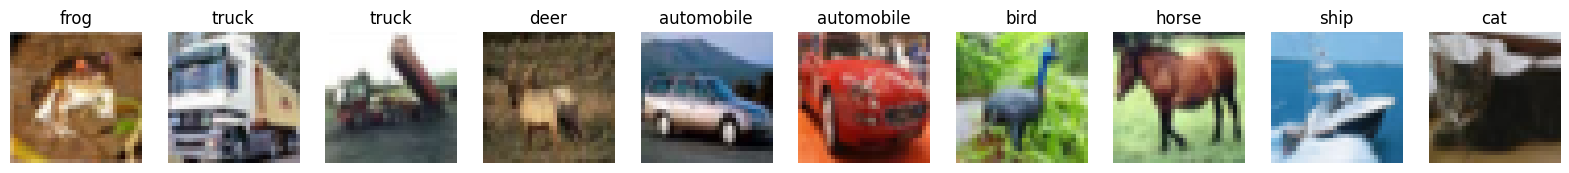

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

def load_cifar_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Specify the folder where the CIFAR-10 batch files are
cifar10_dir = '/content/cifar-10-python/cifar-10-batches-py'

# Load the label names
meta_data_dict = load_cifar_batch(os.path.join(cifar10_dir, 'batches.meta'))
label_names = meta_data_dict[b'label_names']

# Load one batch for demonstration (e.g., data_batch_1)
batch_1_dict = load_cifar_batch(os.path.join(cifar10_dir, 'data_batch_1'))
train_images = batch_1_dict[b'data']
train_labels = batch_1_dict[b'labels']

# Reshape the images
train_images = train_images.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1)

# Display the first 10 images and labels
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i])
    plt.title(label_names[train_labels[i]].decode('utf-8'))  # Decoding from bytes to string
    plt.axis('off')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import pickle
from torchsummary import summary

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data Preprocessing & Augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(15),  # New: Random rotation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # New: Color jitter
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load CIFAR-10 dataset
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4)

# Define Basic Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)
        out = self.relu(out)
        return out

# Define ResNet-18 (Optimized for ≤ 5M Params)
class ResNet18_Small(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet18_Small, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        self.layer1 = self._make_layer(64, 2, stride=1)
        self.layer2 = self._make_layer(256, 2, stride=2)  # Fixed incorrect channel size
        self.layer3 = self._make_layer(128, 2, stride=2)
        self.layer4 = self._make_layer(256, 2, stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def _make_layer(self, out_channels, blocks, stride):
        layers = []
        layers.append(ResidualBlock(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels, 1))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Initialize Model, Move to GPU & Print Parameter Table
model = ResNet18_Small().to(device)
summary(model, input_size=(3, 32, 32))

# Define Loss & Optimizer
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Label Smoothing
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

# Mixup Data Augmentation
def mixup_data(x, y, alpha=1.0):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Training Function
def train_model(model, trainloader, testloader, criterion, optimizer, scheduler, num_epochs=100):
    best_acc = 0
    patience_counter = 0
    early_stopping_patience = 10

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total * 100
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}, Train Accuracy: {train_acc:.2f}%")

        test_acc = evaluate_model(model, testloader)
        scheduler.step(test_acc)

        if test_acc > best_acc:
            best_acc = test_acc
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# Evaluate Model
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    acc = correct / total * 100
    print(f"\nTest Accuracy: {acc:.2f}%")
    return acc

# Train the model
train_model(model, trainloader, testloader, criterion, optimizer, scheduler, num_epochs=100)

Using device: cuda


100%|██████████| 170M/170M [00:06<00:00, 27.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
    ResidualBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
 

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/100], Loss: 1.9943, Train Accuracy: 25.44%

Test Accuracy: 53.90%
Epoch [2/100], Loss: 1.8104, Train Accuracy: 31.60%

Test Accuracy: 60.32%
Epoch [3/100], Loss: 1.7362, Train Accuracy: 35.81%

Test Accuracy: 63.05%
Epoch [4/100], Loss: 1.6773, Train Accuracy: 37.93%

Test Accuracy: 70.40%
Epoch [5/100], Loss: 1.6277, Train Accuracy: 38.67%

Test Accuracy: 73.10%
Epoch [6/100], Loss: 1.5874, Train Accuracy: 38.39%

Test Accuracy: 74.96%
Epoch [7/100], Loss: 1.5769, Train Accuracy: 41.82%

Test Accuracy: 78.30%
Epoch [8/100], Loss: 1.5465, Train Accuracy: 43.03%

Test Accuracy: 79.73%
Epoch [9/100], Loss: 1.5586, Train Accuracy: 41.65%

Test Accuracy: 80.51%
Epoch [10/100], Loss: 1.5062, Train Accuracy: 45.28%

Test Accuracy: 79.45%
Epoch [11/100], Loss: 1.5039, Train Accuracy: 42.82%

Test Accuracy: 78.30%
Epoch [12/100], Loss: 1.4533, Train Accuracy: 45.07%

Test Accuracy: 80.34%
Epoch [13/100], Loss: 1.4932, Train Accuracy: 44.54%

Test Accuracy: 83.98%
Epoch [14/100], Loss:

In [ ]:
class CIFAR10TestDataset(Dataset):
    def __init__(self, data_dict):
        self.data = data_dict[b'data']
        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((32, 32)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Same as CIFAR-10 norm
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]  # No reshaping or transposing
        image = self.transform(image)  # Apply transformations
        return image

# Function to unpickle the test data
def unpickle(file_path):
    with open(file_path, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load the unpickled test data
file_path = "cifar_test_nolabel.pkl"  # Path to the test data
data = unpickle(file_path)

# Create the dataset and dataloader
testset = CIFAR10TestDataset(data)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

# Assuming you have a pretrained model, ensure it's in evaluation mode
model.eval()

# Prepare for inference
predictions = []
image_ids = list(range(len(testset)))  # Ensure all test images have unique IDs

# Move the model to device (if not done already)
model.to(device)

# Run inference
with torch.no_grad():
    for batch_idx, inputs in enumerate(testloader):
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        predictions.extend(predicted.cpu().numpy())  # Store predictions

# Ensure exactly 10,000 predictions (if that's the expected number of test images)
assert len(predictions) == 10000, f"Expected 10,000 predictions, but got {len(predictions)}"

# Convert predictions to a DataFrame
submission_df = pd.DataFrame({"ID": image_ids, "Labels": predictions})

# Save predictions to a CSV file
submission_df.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv with 10,000 rows.")


Submission file saved as submission.csv with 10,000 rows.
